## Do it in unitary operator form

Is U unitary? True
Is U unitary? True


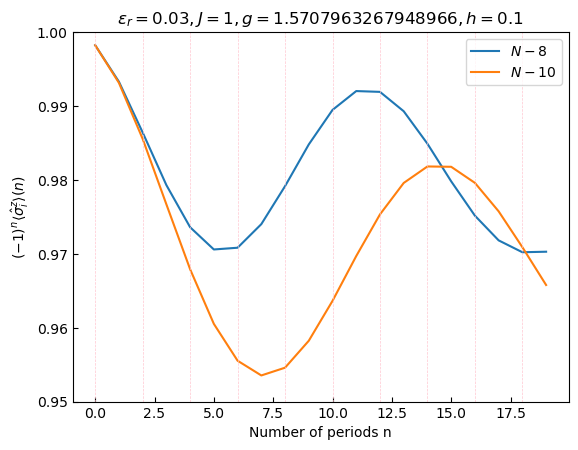

In [24]:
from ssl import Options
from scipy.special import jn_zeros
from itertools import combinations
import numpy as np
from qutip import *
from scipy import signal
import traceback
import tqdm
from multiprocessing import Pool
from scipy.linalg import expm
import matplotlib.pyplot as plt

def pbc_hamiltonian(args):
    N  =  args['N']
    er = args['er']
    J = args['J']
    #beta = args['beta']
    g = args['g']
    h = args['h']
    sx,sy,sz = sigmax(), sigmay(), sigmaz()
    empt = qzero(2**N) + 1j * qzero(2**N)    
    H1, H2, H3 = empt,  empt, empt
        
    for i in range(N-1):
        id = qeye(2**i)    
        dim11 = N-2-i
        id1 = qeye(2**dim11)
        H1 = H1 + Qobj(tensor(id, tensor(sz, tensor(sz, id1))).full())        
    H1 = H1 + Qobj(tensor(sz, tensor(qeye(2**(N-2)), sz)).full())
        
    for i in range(N):
        id = qeye(2**i)    
        dim11 = N-1-i
        id1 = qeye(2**dim11)
        H2 = H2 + Qobj(tensor(id,tensor(sx,id1)).full()) 
                
    for i in range(N):
        id = qeye(2**i)    
        dim11 = N-1-i
        id1 = qeye(2**dim11)
        H3 = H3 + Qobj(tensor(id,tensor(sz,id1)).full())

    H01 = - J * H1
    H11 = - Qobj(H2.full() * er + h * H3.full())
    H02 = - g * H2

    return H01, H11, H02, H3

Ns = [8, 10]
nn = 20  # Time period upto which stroboscopic evolution is computed
J = 1
g = np.pi/2
er = 0.03
h  = 0.1

def strobs_exps(args):
    N = args['N']
    nn = args['nn']    
    
    H01, H11, H02, H3 = pbc_hamiltonian(args)
    V = (H01/ N).full()
    k_eh = H11.full()
    k_pi = H02.full()

    expValues = []
    # Use scipy.linalg.expm for proper matrix exponentiation to ensure unitarity

    U = expm(-1j * k_pi) @ expm(-1j * k_eh) @ expm(-1j * V)
    psi = basis(2**N, 0).full()

    identity_check = U.conj().T @ U
    print("Is U unitary?", np.allclose(identity_check, np.eye(identity_check.shape[0])))

    for i in range(nn):
        psi = U @ psi  # apply unitary
        expValue = np.real(np.vdot(psi, -(H3/N).full() @ psi))  # expectation value
        expValues.append(expValue)
        
    return expValues
    


params = [{'er':er, 'N':N,'J':J, 'g':g, 'maxT':nn, 'h':h, 'nn':nn} for N in Ns]

nprocs = len(Ns)
p = Pool(processes = nprocs) 
opts = Options(nsteps=1e10, num_cpus=1, openmp_threads=1)

data_strob = np.array(p.map(strobs_exps, params))
    
order_param = np.array([(-1)**(i) for i in np.arange(nn)])
for idx, N in enumerate(Ns):
    plt.plot(np.arange(nn), order_param * data_strob[idx], label=fr"$N-{N}$")
    #plt.plot(np.arange(nn), expValues)

#plt.ylim(-1.1,1.1)
for i in np.arange(0, nn, 2):
    plt.axvline(x = i, color = 'pink', alpha = 0.9, lw = 0.5, ls ='--')


plt.xlabel('Number of periods n')
plt.ylabel(r'$(-1)^n\langle \hat{\sigma}^z_i \rangle(n)$')
plt.title(fr"$\epsilon_r={er}, J={J}, g={g}, h={h}$", fontsize = 12)
plt.tick_params(axis='both', which='both', labelsize=10)
plt.tick_params(which='both', direction='in')

plt.ylim(0.95, 1)

plt.legend()
plt.show()

Is U unitary? True
Is U unitary? True


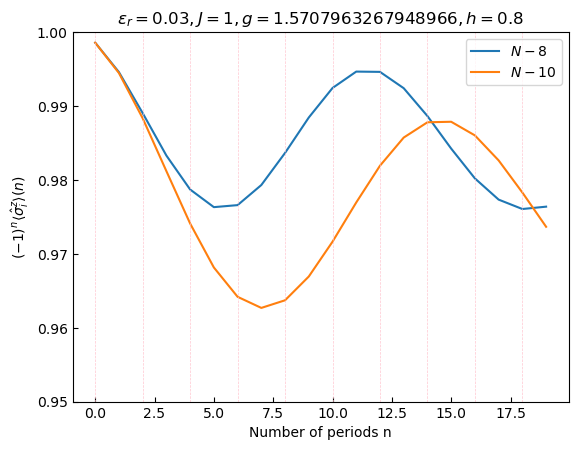

In [25]:
from ssl import Options
from scipy.special import jn_zeros
from itertools import combinations
import numpy as np
from qutip import *
from scipy import signal
import traceback
import tqdm
from multiprocessing import Pool
from scipy.linalg import expm
import matplotlib.pyplot as plt

def pbc_hamiltonian(args):
    N  =  args['N']
    er = args['er']
    J = args['J']
    #beta = args['beta']
    g = args['g']
    h = args['h']
    sx,sy,sz = sigmax(), sigmay(), sigmaz()
    empt = qzero(2**N) + 1j * qzero(2**N)    
    H1, H2, H3 = empt,  empt, empt
        
    for i in range(N-1):
        id = qeye(2**i)    
        dim11 = N-2-i
        id1 = qeye(2**dim11)
        H1 = H1 + Qobj(tensor(id, tensor(sz, tensor(sz, id1))).full())        
    H1 = H1 + Qobj(tensor(sz, tensor(qeye(2**(N-2)), sz)).full())
        
    for i in range(N):
        id = qeye(2**i)    
        dim11 = N-1-i
        id1 = qeye(2**dim11)
        H2 = H2 + Qobj(tensor(id,tensor(sx,id1)).full()) 
                
    for i in range(N):
        id = qeye(2**i)    
        dim11 = N-1-i
        id1 = qeye(2**dim11)
        H3 = H3 + Qobj(tensor(id,tensor(sz,id1)).full())

    H01 = - J * H1
    H11 = - Qobj(H2.full() * er + h * H3.full())
    H02 = - g * H2

    return H01, H11, H02, H3

Ns = [8, 10]
nn = 20  # Time period upto which stroboscopic evolution is computed
J = 1
g = np.pi/2
er = 0.03
h  = 0.8

def strobs_exps(args):
    N = args['N']
    nn = args['nn']    
    
    H01, H11, H02, H3 = pbc_hamiltonian(args)
    V = (H01/ N).full()
    k_eh = H11.full()
    k_pi = H02.full()

    expValues = []
    # Use scipy.linalg.expm for proper matrix exponentiation to ensure unitarity

    U = expm(-1j * k_pi) @ expm(-1j * k_eh) @ expm(-1j * V)
    psi = basis(2**N, 0).full()

    identity_check = U.conj().T @ U
    print("Is U unitary?", np.allclose(identity_check, np.eye(identity_check.shape[0])))

    for i in range(nn):
        psi = U @ psi  # apply unitary
        expValue = np.real(np.vdot(psi, -(H3/N).full() @ psi))  # expectation value
        expValues.append(expValue)
        
    return expValues
    


params = [{'er':er, 'N':N,'J':J, 'g':g, 'maxT':nn, 'h':h, 'nn':nn} for N in Ns]

nprocs = len(Ns)
p = Pool(processes = nprocs) 
opts = Options(nsteps=1e10, num_cpus=1, openmp_threads=1)

data_strob = np.array(p.map(strobs_exps, params))
    
order_param = np.array([(-1)**(i) for i in np.arange(nn)])
for idx, N in enumerate(Ns):
    plt.plot(np.arange(nn), order_param * data_strob[idx], label=fr"$N-{N}$")
    #plt.plot(np.arange(nn), expValues)

#plt.ylim(-1.1,1.1)
for i in np.arange(0, nn, 2):
    plt.axvline(x = i, color = 'pink', alpha = 0.9, lw = 0.5, ls ='--')


plt.xlabel('Number of periods n')
plt.ylabel(r'$(-1)^n\langle \hat{\sigma}^z_i \rangle(n)$')
plt.title(fr"$\epsilon_r={er}, J={J}, g={g}, h={h}$", fontsize = 12)
plt.tick_params(axis='both', which='both', labelsize=10)
plt.tick_params(which='both', direction='in')

plt.ylim(0.95, 1)

plt.legend()
plt.show()

Is U unitary?Is U unitary? Is U unitary? True TrueTrue


Is U unitary? True
Is U unitary? True


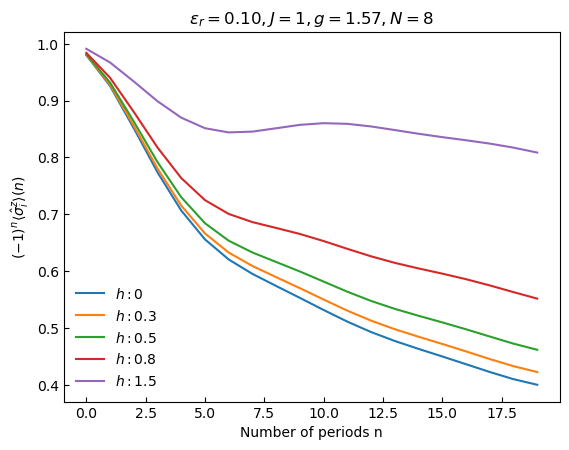

In [16]:
from ssl import Options
from scipy.special import jn_zeros
from itertools import combinations
import numpy as np
from qutip import *
from scipy import signal
import traceback
import tqdm
from multiprocessing import Pool
from scipy.linalg import expm
import matplotlib.pyplot as plt

def pbc_hamiltonian(args):
    N  =  args['N']
    er = args['er']
    J = args['J']
    #beta = args['beta']
    g = args['g']
    h = args['h']
    sx,sy,sz = sigmax(), sigmay(), sigmaz()
    empt = qzero(2**N) + 1j * qzero(2**N)    
    H1, H2, H3 = empt,  empt, empt
        
    for i in range(N-1):
        id = qeye(2**i)    
        dim11 = N-2-i
        id1 = qeye(2**dim11)
        H1 = H1 + Qobj(tensor(id, tensor(sz, tensor(sz, id1))).full())        
    H1 = H1 + Qobj(tensor(sz, tensor(qeye(2**(N-2)), sz)).full())
        
    for i in range(N):
        id = qeye(2**i)    
        dim11 = N-1-i
        id1 = qeye(2**dim11)
        H2 = H2 + Qobj(tensor(id,tensor(sx,id1)).full()) 
                
    for i in range(N):
        id = qeye(2**i)    
        dim11 = N-1-i
        id1 = qeye(2**dim11)
        H3 = H3 + Qobj(tensor(id,tensor(sz,id1)).full())

    H01 = - J * H1
    H11 = - Qobj(H2.full() * er + h * H3.full())
    H02 = - g * H2

    return H01, H11, H02, H3

N = 8
nn = 20  # Time period upto which stroboscopic evolution is computed
J = 1
g = np.pi/2
er = 0.1
hs  = [0, 0.3, 0.5, 0.8, 1.5]

def strobs_exps(args):
    N = args['N']
    nn = args['nn']    
    
    H01, H11, H02, H3 = pbc_hamiltonian(args)
    V = (H01/ N).full()
    k_eh = H11.full()
    k_pi = H02.full()

    expValues = []
    # Use scipy.linalg.expm for proper matrix exponentiation to ensure unitarity

    U = expm(-1j * k_pi) @ expm(-1j * k_eh) @ expm(-1j * V)
    psi = basis(2**N, 0).full()

    identity_check = U.conj().T @ U
    print("Is U unitary?", np.allclose(identity_check, np.eye(identity_check.shape[0])))

    for i in range(nn):
        psi = U @ psi  # apply unitary
        expValue = np.real(np.vdot(psi, -(H3/N).full() @ psi))  # expectation value
        expValues.append(expValue)
        
    return expValues
    

params = [{'er':er, 'N':N,'J':J, 'g':g, 'maxT':nn, 'h':h, 'nn':nn} for h in hs]

nprocs = len(hs)
p = Pool(processes = nprocs) 
opts = Options(nsteps=1e10, num_cpus=1, openmp_threads=1)

data_strob = np.array(p.map(strobs_exps, params))
    
order_param = np.array([(-1)**(i) for i in np.arange(nn)])
for idx, h in enumerate(hs):
    plt.plot(np.arange(nn), order_param * data_strob[idx], label=fr"$h:{h}$")
    #plt.plot(np.arange(nn), expValues)

#plt.ylim(-1.1,1.1)
#for i in np.arange(0, nn, 2):
#    plt.axvline(x = i, color = 'blue', alpha = 0.3,ls ='--')


plt.xlabel('Number of periods n')
plt.ylabel(r'$(-1)^n\langle \hat{\sigma}^z_i \rangle(n)$')
plt.title(fr"$\epsilon_r={er:1.2f}, J={J}, g={g:2.2f}, N={N}$", fontsize = 12)
plt.tick_params(axis='both', which='both', labelsize=10)
plt.tick_params(which='both', direction='in')

#plt.ylim(0.95, 1)

plt.legend(frameon =False)
plt.show()